## Data Prep CA1

### Contents
1. Introduction
2. Functions used
3. Results
4. Conclusion

### 1. Introduction

This assignment will investigate a dataset containing "APS Failure and Operational Data for Scania Trucks". The dataset is a subset of failures in Scania trucks with the positive class being failures related to the Air Pressure system, and the negative class being trucks with failures not related to the Air Pressure system.

The main task for this assignment is to perform dimmensionality reduction to establish the minimum number of features needed while keeping 99.5% variance.

<b>1.1 Theory

Dimensionality reduction 

The curse of dimensionality reduction



PCA, dimensionality reduction. Coerrelation. Evaluating dimensionality reduction.


model with LASSO/Ridge on non pca data for comparisons for dimensionality reduction (L1 v L2)? .. which features are important

<b>1.2 Library Imports

The following libraries are used in this assignment.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

from scipy import stats
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import linregress
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

<b>1.3 Dataset Load

The dataset used is of "APS Failure and Operational Data for Scania Trucks".

In [2]:
df = pd.read_csv("aps_failure_set.csv")

In [3]:
# showing all features
pd.set_option("display.max_columns", None)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

<b> Data Dictionary

### 2. Selection of Functions Used

In [4]:
def prelim(df):
    print(f"Dataframe Shape: {df.shape} \n")
    print(f"Dataframe statistical information: \n{df.describe()} \n")
    print(f"Object datatype statistical information: \n{df.describe(include=object)} \n")
    print(f"Dataframe info function: \n{df.info()} \n")
    print(df.isnull().sum())

In [5]:
# function that views the missing values of the first x row's
def missing_values_vis(df, end_row, title="Missing Values Matrix"):
    subset_1 = df.iloc[:end_row, :85]
    subset_2 = df.iloc[:end_row, 85:]
    
    fig, axes = plt.subplots(2, 1, figsize=(20, 12))

    msno.matrix(subset_1, ax=axes[0], sparkline=False)
    axes[0].set_title('Subset 1: Missing Values in Features 1 - 84')

    axes[0].set_xticks(range(len(subset_1.columns)))
    axes[0].set_xticklabels(subset_1.columns, rotation=90)

    msno.matrix(subset_2, ax=axes[1], sparkline=False)
    axes[1].set_title('Subset 2: Missing Values in Features 85 - 171')

    axes[1].set_xticks(range(len(subset_2.columns)))
    axes[1].set_xticklabels(subset_2.columns, rotation=90)
    
    plt.suptitle(title, fontsize=20)

    plt.show()

In [6]:
# basic countplot
def countplot(df, var, x_size=4, y_size=4, title="Countplot", x_label="Values", y_label="Count",
             rotate_xticks=0):
    plt.figure(figsize=(x_size, y_size))
    bw_palette = sns.color_palette("binary")
    sns.set_palette(bw_palette)
    sns.countplot(data=df, x=var)#, hue=var) hue thins the bars..
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotate_xticks)
    plt.title(title)
    plt.show()

In [7]:
def make_sparse_df(df):

    # make df, adding total entries now so it's at the start
    sparse_df = pd.DataFrame(columns=["total entries"])
    
    # total num of zeros
    total_zeros = df.eq(0).sum()
    sparse_df["total_zeros"] = total_zeros

    # total % of zeros
    zero_percentages = (total_zeros / len(df)) * 100
    sparse_df["zero_percentages"] = zero_percentages

    # total num of null
    total_null = df.isnull().sum()
    sparse_df["total_null"] = total_null

    # total % of null
    null_percentages = (total_null / len(df)) * 100
    sparse_df["null_percentages"] = null_percentages
    
    # 60000 for each row
    sparse_df["total entries"] = len(df)
    
    # total sparse %
    sparse_df["total_sparce_percent"] = sparse_df["zero_percentages"] + sparse_df["null_percentages"]
    
    # non sparse % (inverse of above)
    sparse_df["non_null_percentage"] = 100 - sparse_df["null_percentages"]
    
    return sparse_df

In [8]:
# plotting row
# missing values are filled as 0 
def row_plot(df, row_num=0, y_start=0, y_end=80, title=None):

    row = df.iloc[row_num, y_start:y_end]

    # Fill missing values with 0
    row_filled = row.fillna(0)
    
    if title is not None:
        title = f" of {title}"
    else:
        title = ""
        
    
    plt.figure(figsize=(16, 4))

    # Plot the data points
    plt.plot(row_filled, label=f"Values (0 - {row_filled.max():.2e})", color="black")

    # missing values
    missing_indices = row.index[row.isnull()]
    missing_values = row_filled[missing_indices]
    plt.plot(missing_indices, missing_values, linestyle="",  marker="o", markersize=4, color="red", label="Missing Data (filled as zero)")

    plt.xlabel(f"Features {y_start+1} - {y_end+1}, from 171 total features")
    plt.ylabel(f"Values (0 - {row_filled.max():.2e})")
    plt.title(f"Values for Row {row_num}{title}")
    
    plt.xticks(rotation=75)
    
    # legend
    plt.legend()

    plt.show()

In [9]:
# maybe use a function to shade missing values
def row_plot_missing(row):
    row_filled = row.fillna(0)

In [10]:
def undersample(df):
    data = df
    X = data.drop(columns=['class'])  
    y = data['class']


    class_counts = y.value_counts()


    desired_samples = 1000
    sampling_strategy = {
        class_label: desired_samples
        for class_label, count in class_counts.items()
    }


    undersampler = RandomUnderSampler(sampling_strategy={class_label: 1000 
                                                         for class_label, 
                                                         count in class_counts.items()
                                                        }
                                      , random_state=88)


    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)
    return undersampled_data

In [11]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="RdBu", fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

### 3. Results

<b>3.1 First EDA

Using pandas functions for summary statistics some things are noticed. There are 60000 entries and 171 features. 170 of the 171 columns are categories.

In this case, the pandas head and describe functions both reveal something about the dataset. While some of the features explored seem numerical, they have values of "na".

In [12]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [13]:
prelim(df)

Dataframe Shape: (60000, 171) 

Dataframe statistical information: 
             aa_000
count  6.000000e+04
mean   5.933650e+04
std    1.454301e+05
min    0.000000e+00
25%    8.340000e+02
50%    3.077600e+04
75%    4.866800e+04
max    2.746564e+06 

Object datatype statistical information: 
        class ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique      2     30   2062   1887    334    419    155    618   2423   7880   
top       neg     na      0     na      0      0      0      0      0      0   
freq    59000  46329   8752  14861  55543  55476  59133  58587  56181  46894   

       ag_004 ag_005 ag_006 ag_007 ag_008 ag_009 ah_000 ai_000 aj_000 ak_000  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique  23072  40798  40616  32126  18933   5356  43572   4056    895    160   
top         0      0      0      0      0      0     na      0     

<b>3.2 Setting null values

A quick way to remedy this is to reload the dataset setting "na" as a null value. By default, Pandas does not include "na" as a null value*, and this can be added with the na_values function.

**pandas documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html*

In [14]:
df = pd.read_csv("aps_failure_set.csv", na_values="na")

In [15]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

<b>3.3 Second EDA

Now when the same statistical function is performed only one feature remains categorical, and the other features have been automatically loaded as numerical.

In [16]:
prelim(df)

Dataframe Shape: (60000, 171) 

Dataframe statistical information: 
             aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03 

<b>Statistical Analysis

Investigate differences in figures.. There should be some things to look at here... some features have the majority of their values 0 etc. (sparse data)

<b>Categorical Features

<b> Class variable

The class variable is the only categorical variable left in the dataset. It is a binary category with two values; "neg" and "pos". It has no missing data and it is unbalanced.

At this stage the class variable is encoded; 1 for 'pos', 0 for 'neg'.

In [17]:
df["class"].isnull().sum()

0

In [18]:
df["class"].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

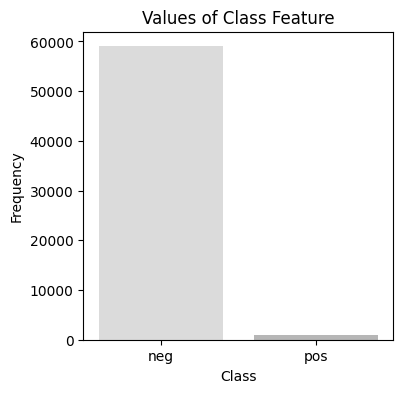

In [19]:
countplot(df, "class", title="Values of Class Feature",
         x_label="Class", y_label="Frequency")

In [20]:
mapping = {'neg': 0, 'pos': 1}
df['class'] = df['class'].map(mapping)

<b> Numerical Features

<b> Range

The range of the variables is one measure of spread.

The selection of quantative features shown with the head function all have a min value of 0, some have an innerquartile range of 0 meaning the majority of the data is sparse. There seems to be large outliers within the data.

The head function could be transposed to view the information for all the dataset, but it would leave 170 rows of variables to analyse. Instead, visualisation could be used to give a clearer image of the data.

First the minimum and maximum values of each feature is shown. It confirms that for most features, apart from 2 (which have minimums of 172 and 1209600), have a minimum of 0, which also shows that all numerical values are positive in the dataset.

The maximum values are harder to make a statement on after printing them, and for this it seems visualisation would give a clearer image of the data. They have values ranging from 2 to 8 billion. For most features the range is the maximum value, as 0 is their lowest. So instead of a plot of the maximum values, a plot of binned ranges is shown.

Although, the binned plot of ranges we are also looking at a graph of the maximum values, given that the two values with non 0 minimums wouldn't change bins with the criteria used.

The data has large outliers that will need scaled for modelling.

In [21]:
min_values = np.min(df.iloc[:, 1:], axis=0)
max_values = np.max(df.iloc[:, 1:], axis=0)

min_max_df = np.vstack((min_values, max_values))

In [22]:
min_max_df

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [23]:
min_df = pd.DataFrame(min_values, columns=["min_values"])
max_df = pd.DataFrame(max_values, columns=["max_values"])

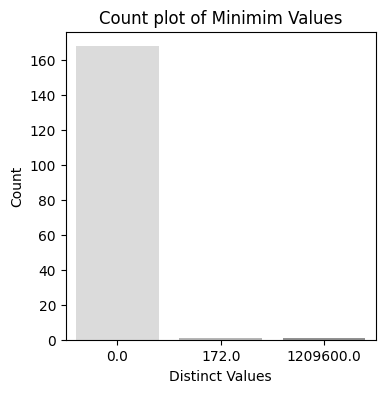

In [24]:
countplot(min_df, "min_values", title="Count plot of Minimim Values",
         x_label="Distinct Values")

In [25]:
range_df = max_values - min_values
range_df = pd.DataFrame(range_df, columns=["feature_range"])

In [26]:
# test log scale for this
# right is set to false so these will be the edges of the bins
bin_edges = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, 500000000, 1000000000, float('inf')]

# bin labels
bin_labels = ["0 - 1000", "1001 - 10,000", "10,001 - 100,000", "100,000 - 1 million", "1 million - 10 million", 
              "10 million - 100 million", "100 million - 500 million", "500 million - 1 billion", "1 billion - 8 billion"]  

range_df['bins'] = pd.cut(range_df["feature_range"], bins=bin_edges, labels=bin_labels, right=False)
   

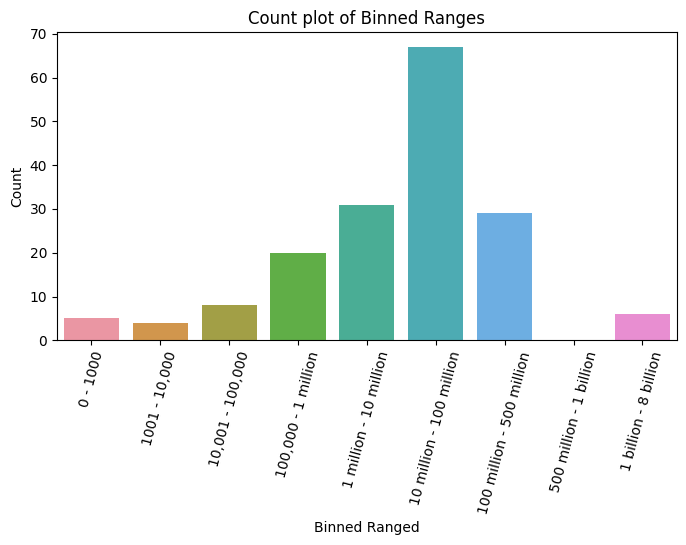

In [27]:
countplot(range_df, "bins", title="Count plot of Binned Ranges",
         x_label="Binned Ranged", x_size=8, rotate_xticks=75)

<b>Inner Quartile Range

The innerquartile range (IQR) is a useful measure of spread of a variable. It is less susceptable to extreme values than the range (Spiegelhalter, p. 49). Using pandas head function above showed many columns with an IQR of 0.

Features with IQR of 0 vs. Features with Non-zero IQR can be plotted to give an idea of how prevelant an IQR of 0 is in the dataset, and below it can be seen that 36.8% of columns have an IQR of 0.

The data is fairly sparse and it's possible that the outliers are associated with certain failures, or vice-versa.

In [28]:
df1 = df.drop("class", axis=1)
iqr = df1.quantile(0.75) - df1.quantile(0.25)


features_with_iqr_zero = iqr[iqr == 0].index
df_iqr_zero = df[features_with_iqr_zero]

df_iqr_non_zero = df.drop(columns=features_with_iqr_zero)

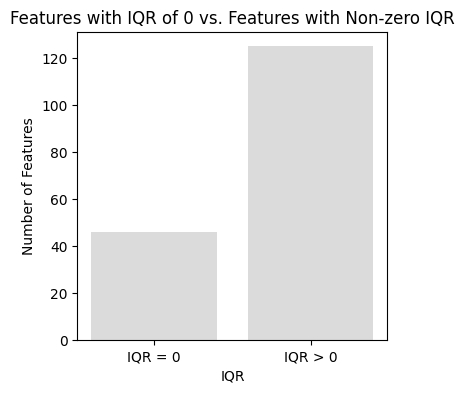

In [29]:
plt.figure(figsize=(4, 4))
plt.bar(['IQR = 0', 'IQR > 0'], [len(df_iqr_zero.columns), len(df_iqr_non_zero.columns)])

plt.xlabel('IQR')
plt.ylabel('Number of Features')
plt.title('Features with IQR of 0 vs. Features with Non-zero IQR')
plt.show()

In [30]:
len(df_iqr_zero.columns)

46

In [31]:
len(df_iqr_non_zero.columns)

125

In [32]:
print(f"Percentage of 0 IQR features: {len(df_iqr_zero.columns)/len(df_iqr_non_zero.columns)*100}")

Percentage of 0 IQR features: 36.8


<b>Correlations -- is there correlation in the data -- may allow things to be dropped

In [33]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,Na

<b>Feature Distributions

Look at the distributions of the features. Possibly with plot with tabs or just a selection of tabs

In [34]:
pearson_corr = df.corr(method='pearson')

# Display the correlation matrix
print(pearson_corr)

           class    aa_000    ab_000    ac_000    ad_000    ae_000    af_000  \
class   1.000000  0.536978  0.031896 -0.036533 -0.000415  0.008873  0.022532   
aa_000  0.536978  1.000000  0.073103 -0.032055 -0.001903  0.061971  0.089474   
ab_000  0.031896  0.073103  1.000000 -0.019411  0.047281  0.031031  0.053532   
ac_000 -0.036533 -0.032055 -0.019411  1.000000 -0.002380 -0.004997 -0.010554   
ad_000 -0.000415 -0.001903  0.047281 -0.002380  1.000000 -0.000214 -0.000269   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.160580  0.606232  0.023867 -0.029417 -0.000829  0.052357  0.070306   
ee_008  0.235880  0.471707  0.039369  0.016908 -0.002161 -0.010850 -0.013976   
ee_009  0.116099  0.248039  0.074119  0.024354 -0.001050 -0.008206 -0.010237   
ef_000  0.018400  0.019865  0.055590 -0.006571 -0.000102  0.070886  0.106281   
eg_000  0.017526  0.037099  0.162948  0.014228 -0.000120  0.041715  0.060710   

          ag_000    ag_001    ag_002   

<b>Percentage of sparse data

The data is considerable sparse, with over one third of the features with an IQR of 0.



In [35]:
sparse_df = make_sparse_df(df)
# ignoring class as it's mostly zeros now
sparse_df.iloc[1:,:].head()

,total entries,total_zeros,zero_percentages,total_null,null_percentages,total_sparce_percent,non_null_percentage
aa_000,60000,393,0.655000,0,0.000000,0.655000,100.000000
ab_000,60000,10977,18.295000,46329,77.215000,95.510000,22.785000
ac_000,60000,8752,14.586667,3335,5.558333,20.145000,94.441667
ad_000,60000,2009,3.348333,14861,24.768333,28.116667,75.231667
ae_000,60000,55543,92.571667,2500,4.166667,96.738333,95.833333


<b>Missing Values

Now that the "na" values are correctly recognised as missing values they can be visualised.

Below a matrix of missing values is shown using the Missingno library, with white horizontal bands showing rows with groupings of missing data and vertical bars indicating features with missing data (slighter vertical bars indicate a separation of features).

Missingno matrix can be hard to interpid with a lot of data, and by limiting the data viewed patterns emerge.This indicates non random missing data (Harrison, 2019). Given that this dataset is of APS failure data, the bands or patterns could be related to specific failure types.

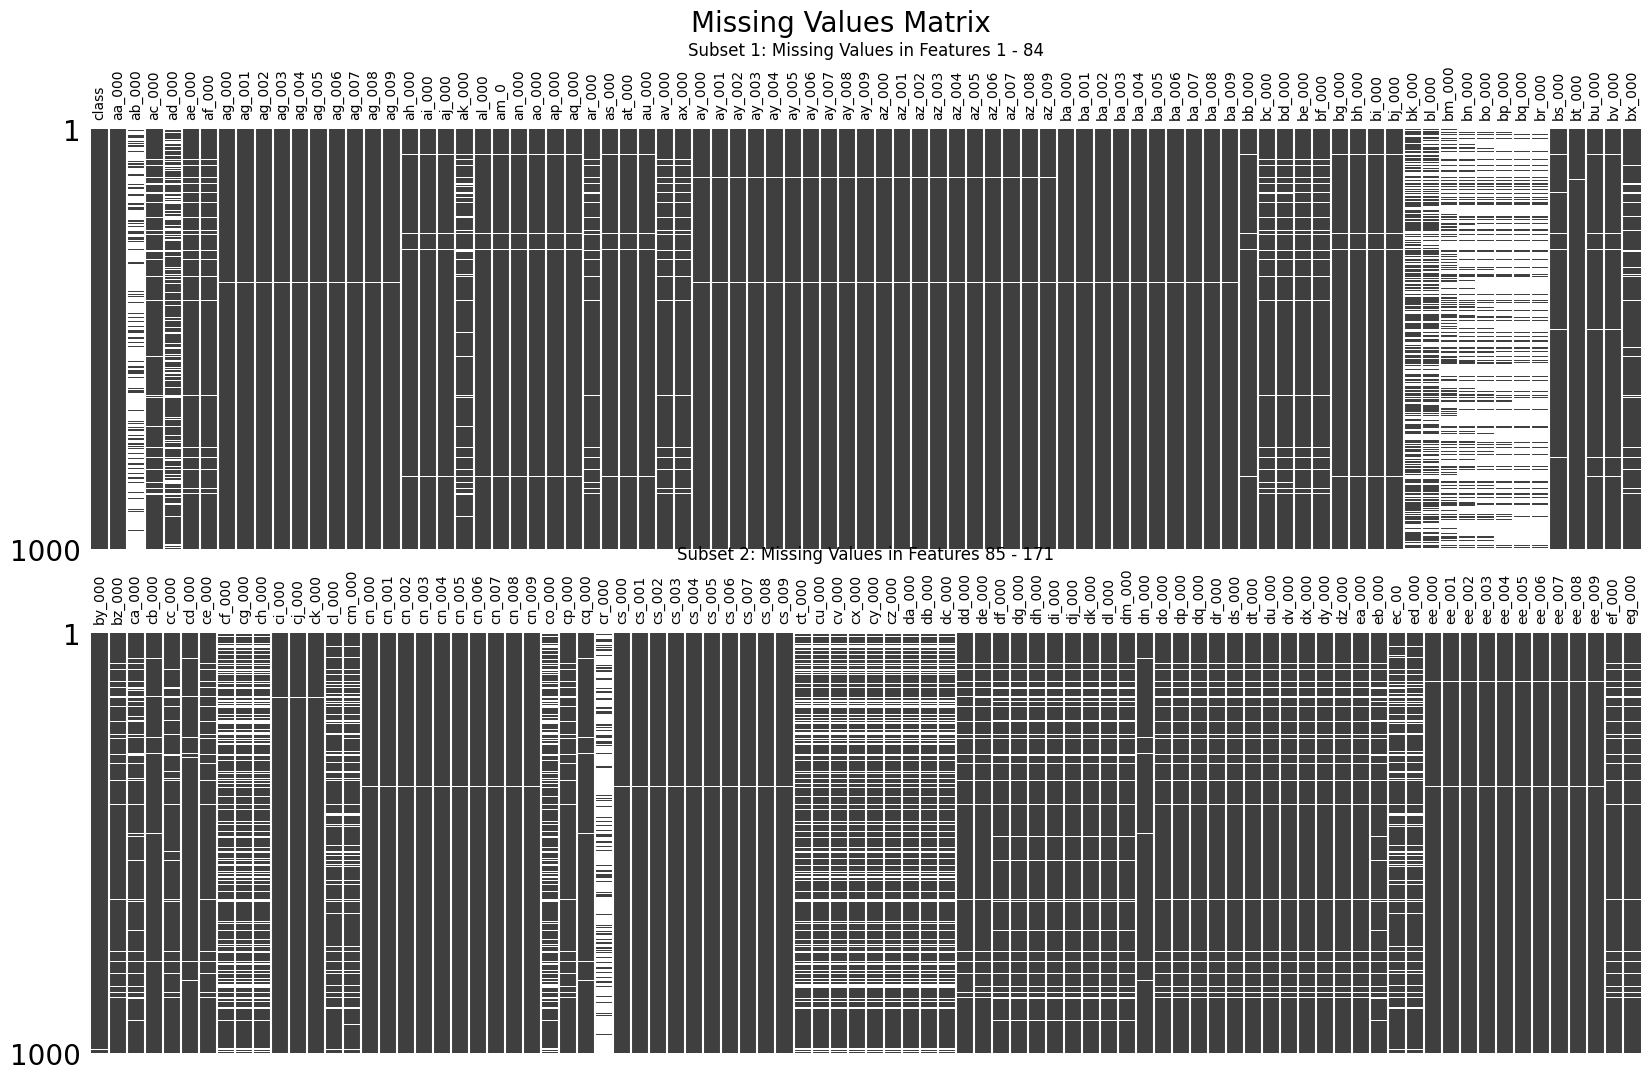

In [36]:
missing_values_vis(df, 1000)

<b>Missing values per "class" variable -- try this with sampling

Different patterns of missing values can be seen when the missing value matrix are split into the two different values of the "class" variable.

It might hint that they are related to the different states of "class". 

Bands could represent failings on the same part? They were labelled "na" specifically? Perhaps there are other "sensors" that "fail" before the missing values give no reading, or other indicator variables that

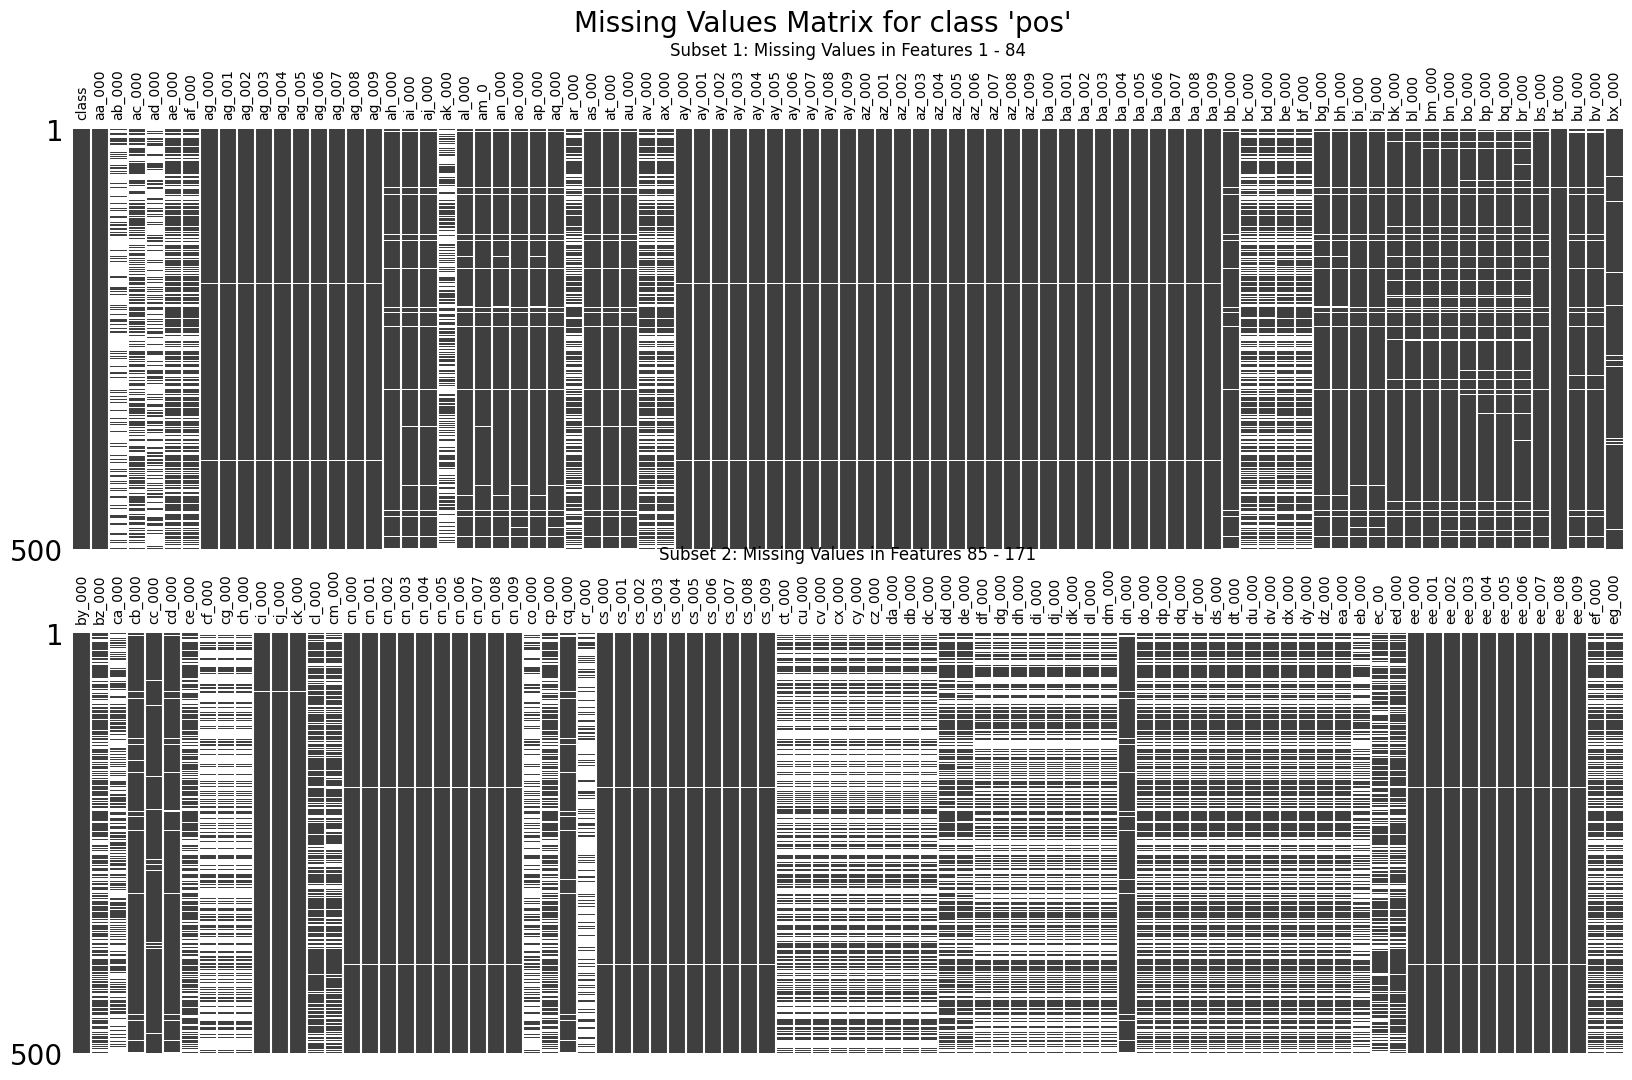

In [37]:
df1 = df[df["class"]==1]
missing_values_vis(df1, 500, "Missing Values Matrix for class 'pos'")

In [38]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.00,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.00,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,

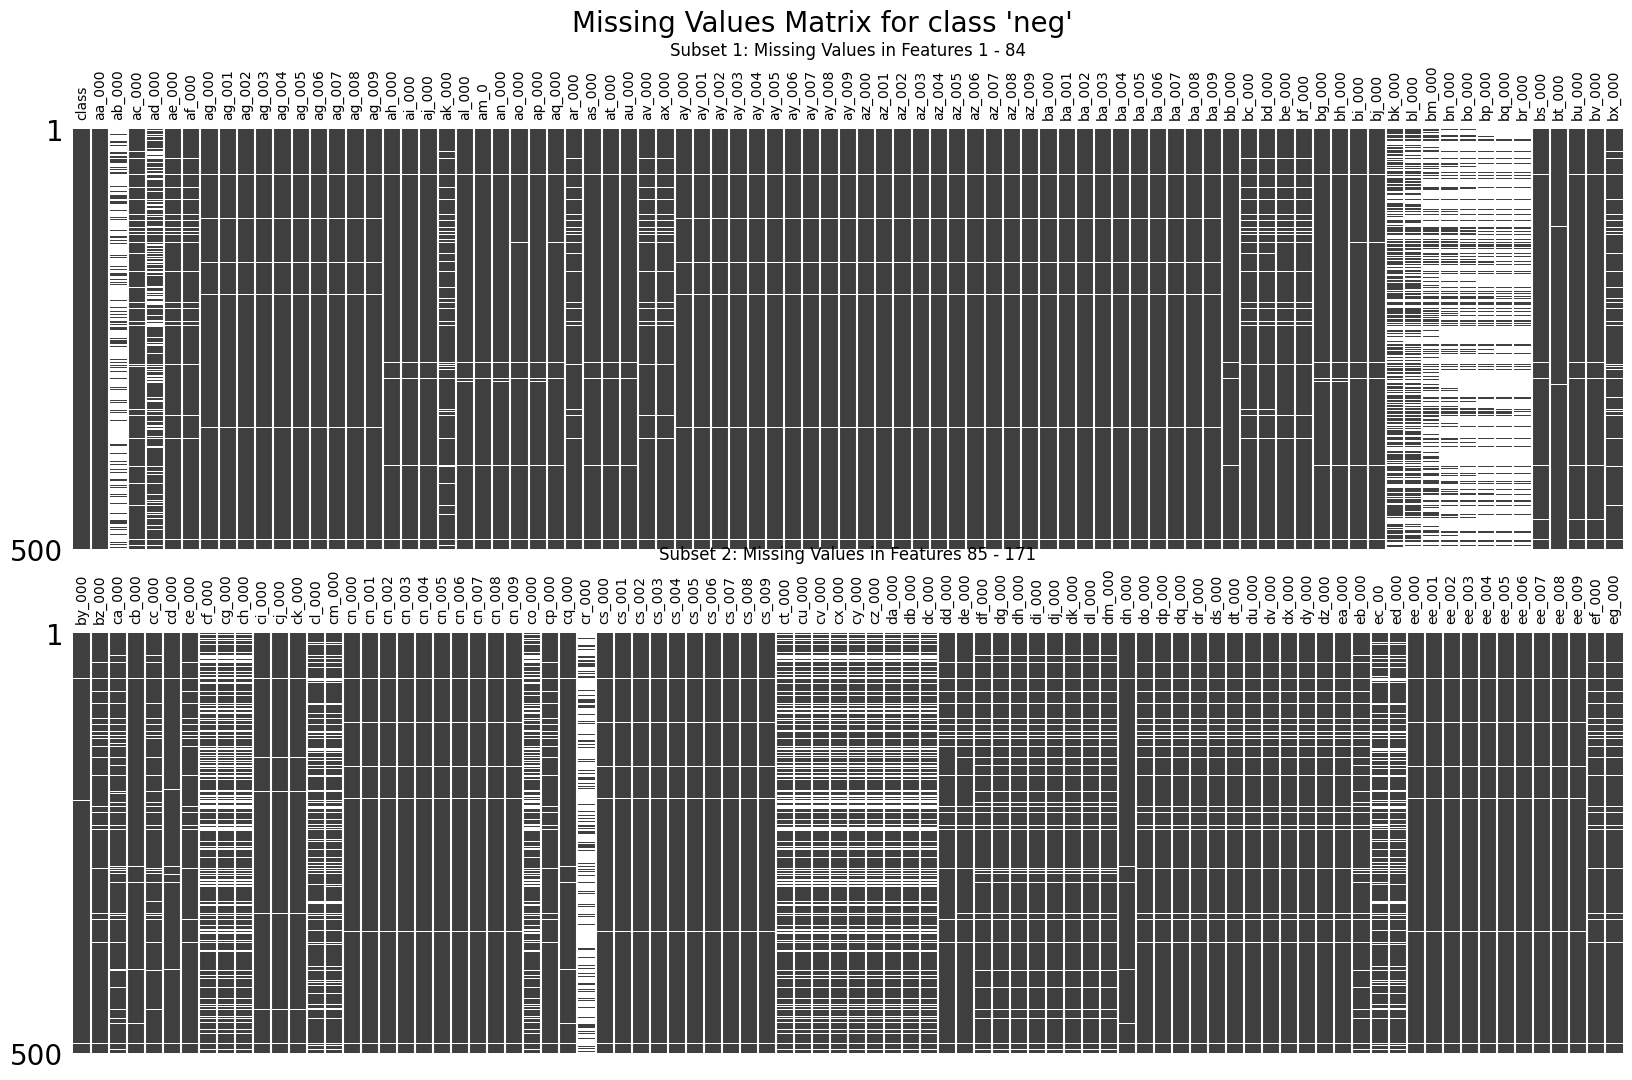

In [39]:
df1 = df[df["class"]==0]
missing_values_vis(df1, 500, "Missing Values Matrix for class 'neg'")

<b> Duplicates

Although their seems like considerable pattern to the null data, there are no duplicated rows in the dataset.

In [40]:
df_no_duplicates = df.drop_duplicates()

print(f"Original dataframe shape: {df.shape}")
print(f"Dropped dataframe shape: {df_no_duplicates.shape}")

Original dataframe shape: (60000, 171)
Dropped dataframe shape: (60000, 171)


<b>Features with the highest missing data

From the missing plots above, it's clear that there is some relationship between data being missing and and the features, with bands of missing data stretching across multiple features that seem to be grouped by the same 'prefix' (cs_000, cs_001, cs_002 etc).

It looks like some bands of missing data stretch across all features, although the visualisation is split and 500 features are shown, so to be sure it's checked below, and no rows contain all missing data.



In [41]:
rows_with_all_missing = df[df.isna().all(axis=1)]

rows_with_all_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(2)
memory usage: 0.0 bytes


In [42]:
missing_counts = df.isnull().sum()
sorted_columns = missing_counts.sort_values(ascending=False)
print(sorted_columns)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
          ...  
cj_000      338
ci_000      338
bt_000      167
aa_000        0
class         0
Length: 171, dtype: int64


<b>Missing data percentage

In [43]:
missing_counts = missing_counts/60000 * 100

In [44]:
missing_counts

class      0.000000
aa_000     0.000000
ab_000    77.215000
ac_000     5.558333
ad_000    24.768333
            ...    
ee_007     1.118333
ee_008     1.118333
ee_009     1.118333
ef_000     4.540000
eg_000     4.538333
Length: 171, dtype: float64

In [45]:
missing_counts = pd.DataFrame(missing_counts, columns=["percent_missing"])

In [46]:
missing_counts = missing_counts.sort_values(ascending=False, by="percent_missing")
missing_counts

,percent_missing
br_000,82.106667
bq_000,81.203333
bp_000,79.566667
bo_000,77.221667
ab_000,77.215000
...,...
cj_000,0.563333
ci_000,0.563333
bt_000,0.278333
aa_000,0.000000


In [47]:
missing_data = missing_counts['percent_missing']

bin_edges = [-1, 0.001, 20, 40, 60, 80, 100]  
binned_data_labels = ['0%', '0.001-20%', '20-40%', '40-60%', '60-80%', '80-100%']

binned_data = pd.DataFrame()
# Bin the data and convert to string
binned_data['bins'] = pd.cut(missing_counts["percent_missing"], bins=bin_edges, labels=binned_data_labels)#.astype(str)


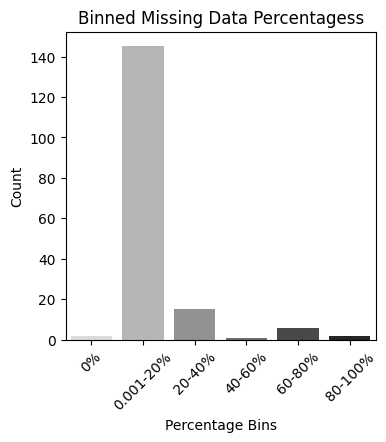

In [48]:
countplot(binned_data, "bins", title="Binned Missing Data Percentagess",
         x_label="Percentage Bins", rotate_xticks=45)

In [49]:
df1 =df.drop("class", axis=1)

In [50]:
type(sorted_columns)

pandas.core.series.Series

<Figure size 1400x800 with 0 Axes>

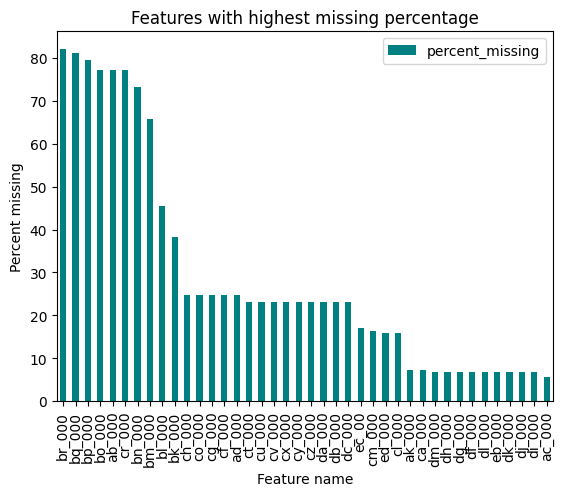

In [51]:
# dont show tail end which is represented in above graph
plt.figure(figsize=(14, 8))

missing_counts.iloc[:40].plot(
    kind='bar',        
    title='Features with highest missing percentage', 
    xlabel='Feature name', 
    ylabel='Percent missing',
    color='teal'       
)


plt.show()

<b> Chi-squared Test --- perform with sample -- which reinforces sparse matrix of different patterns in missing data 

A Chi-squared test is useful in analysing the proportions of categories to determine if there is a significant difference between the proportions (Rowntree, p. 153). The *class* feature is a binary category with two values; "neg" and "pos". A test of signicance can be done to verify the null hypothesis which states that there is no relationship between the missing values (for the feature that is tested) and the class variable.

It shows, as implied from the missing data visualisation, that there are certain null values associated with certain states of *class*. The contingency table below shows null values as True and non-null as False.

The p-value of 0.0 is significant and confirms the alternative hypothesis, and that there is a relationship between the missing data (of the feature tested) and values of *class.* *This was suspected from the sparse matrix.*

This does imply that there could be signal in if a value is missing or not, and could warrant more investigation.

In [52]:
undersampled_data = undersample(df)

In [53]:
undersampled_data["class"].value_counts()

class
0    1000
1    1000
Name: count, dtype: int64

In [54]:
contingency_table = pd.crosstab(undersampled_data["class"], undersampled_data["br_000"].isnull())

chi2, p, dof, expected = chi2_contingency(contingency_table)

In [55]:
contingency_table

br_000,False,True
class,,
0,162,838
1,910,90


In [56]:
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared statistic: 1121.8335853062274
p-value: 5.9363803150945e-246
Degrees of freedom: 1
Expected frequencies: [[536. 464.]
 [536. 464.]]


<b>Bands of missing data -- examine the bands of actual data

In [57]:
print(df.iloc[:,79:100].columns)

Index(['br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000',
       'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000',
       'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000'],
      dtype='object')


In [58]:
df1.iloc[:,72:80].head()

,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000
0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0
1,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0
2,130640.0,NaN,NaN,NaN,NaN,NaN,NaN,28000.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580.0
4,282560.0,274180.0,NaN,NaN,NaN,NaN,NaN,189000.0


<b>Examing Bands of data

Until now we have looked at patterns in the missing data, and used that to make deductions about the zero or real numbers that would be in the data. And that we'd expect different null values to appear for different values of class.

But that has left some questions; on how to deal with the missing data? what is the relationship in outliers? 

We have looked at variablity measures to get an idea of the scale of the data and outliers in the data, and while we have looked at bands of missing data, and the next logical step is to look the bands of numbers and see if there is suspected pattern in the bands. And when we do that we see that there is..

So there is pattern/information that is stored in horizontal bands? possibly grouped/labelled with the aa, ab adjective groupings

Could be readings over time.. different sensor peaks?

Need to look at these per class and possibly per row.. look at the band of rows with high missing data.. what does the data look like there when it isn't missing.. does it follow the pattern of higher missing = more numbers or more zeros... if is more zeros what are those rows doing and could they be dummy encoded for missing and non missing

The variance is in a huge scale.. making some peaks not showing, but when they are 'zoomed' in on by discluding the larger peaks pattern still shows.

In [59]:
df1 = df.drop("class", axis=1)

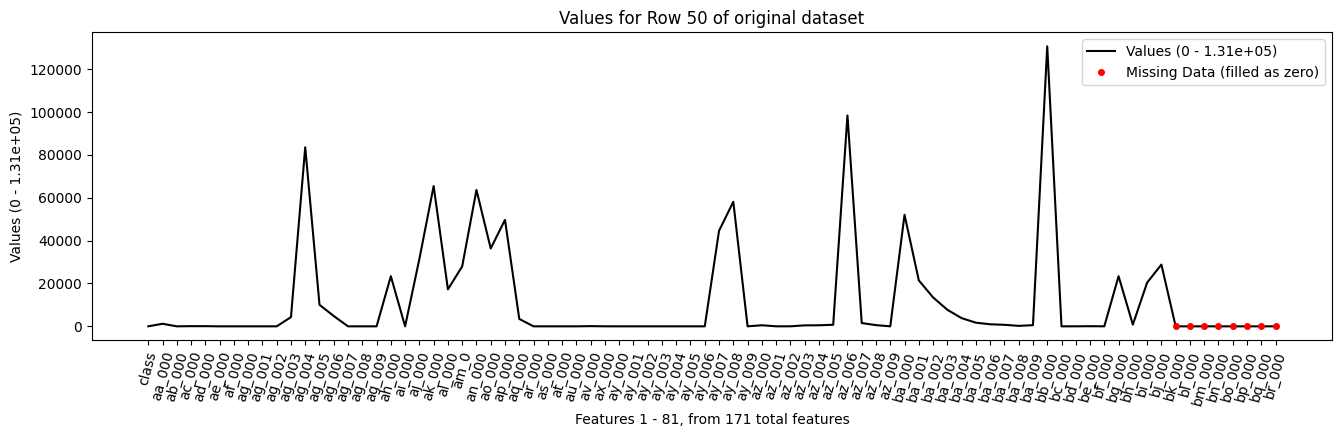

In [60]:
row_plot(df, 50, title="original dataset")

<b>Log Transformation

Some values don't show as peaks when graphing rows because the scale of one point forces them to be smaller. When a log transformation is applied, the exponential nature of the data is revealed and multiple peaks are shown.

A Log transformation before standardisation might be helpful to deal with the scale of the data.

In [61]:
df_log = df.drop("class", axis=1)
df_log_transformed = df_log.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)
df_log_transformed = df_log_transformed.replace(-np.inf, 0)
df_log_transformed = pd.concat([df["class"], df_log_transformed], axis=1)

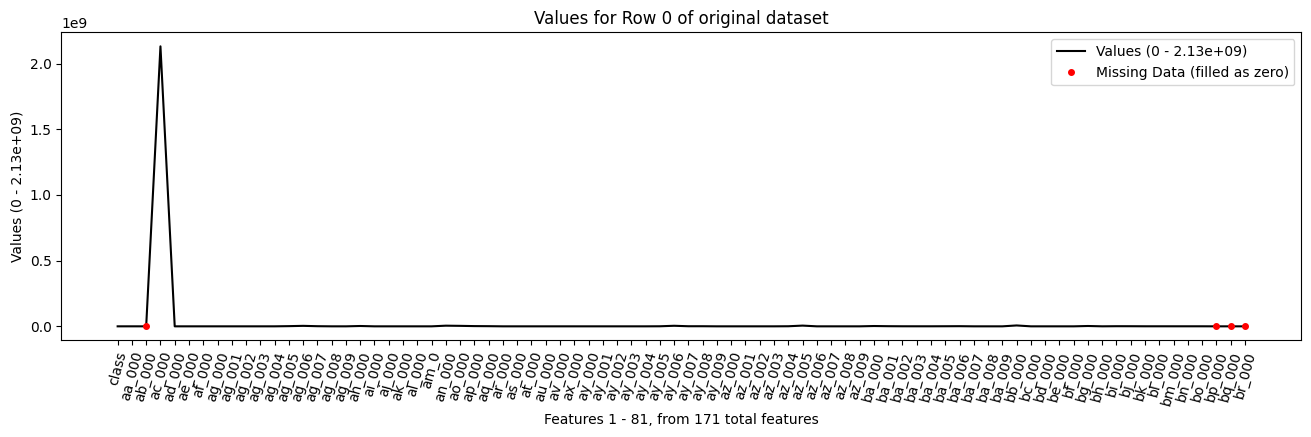

In [62]:
row_plot(df, title="original dataset")

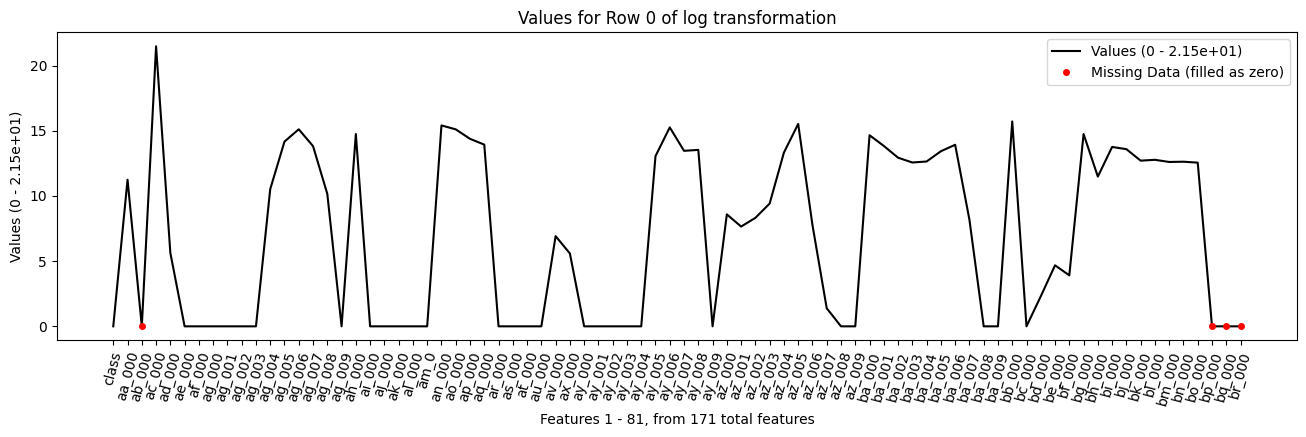

In [63]:
row_plot(df_log_transformed, title="log transformation")

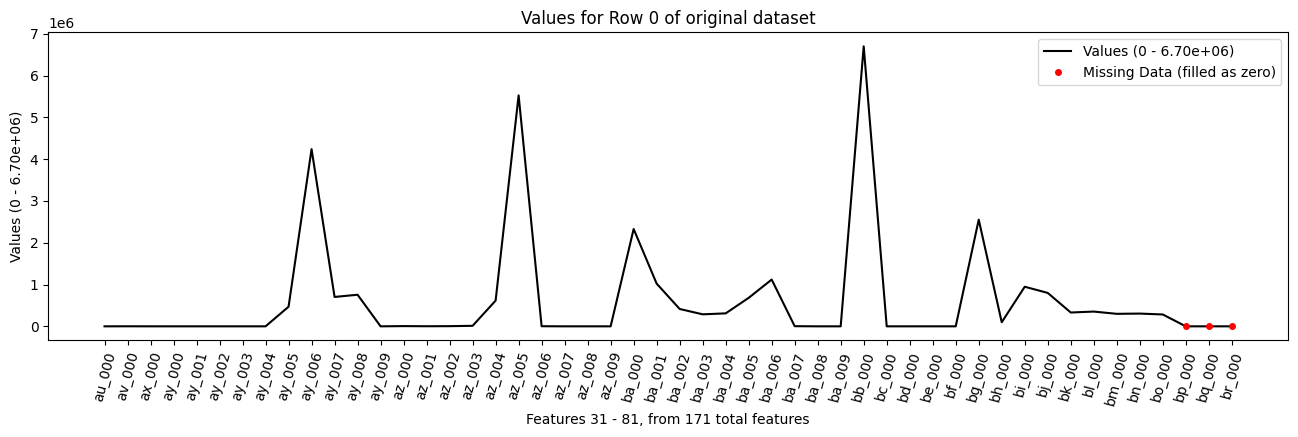

In [64]:
row_plot(df, y_start=30, y_end=80, title="original dataset")

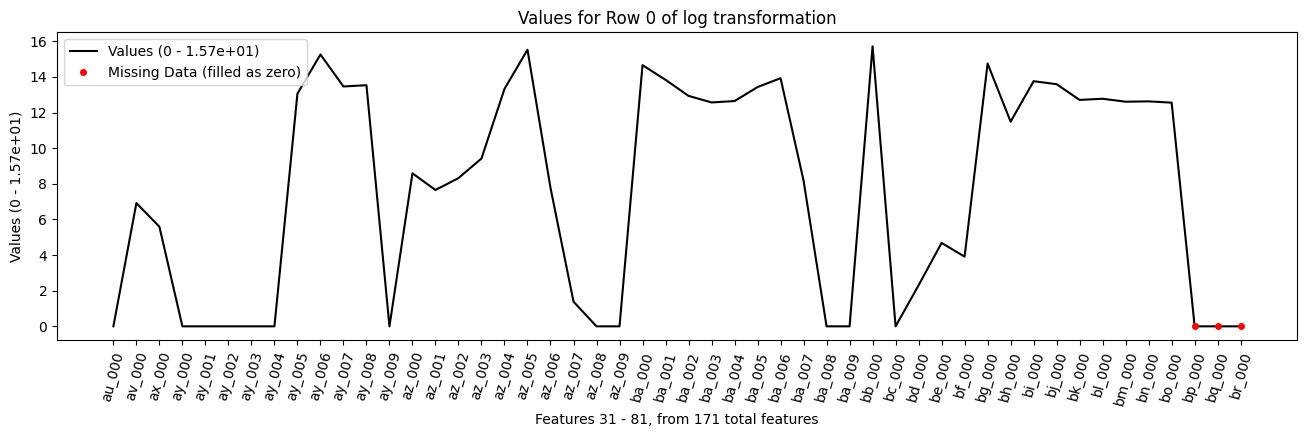

In [65]:
row_plot(df_log_transformed, y_start=30, y_end=80, title="log transformation")

<b>3.4 Feature Count

The above statistical view only shows a snapshot of information from the total features. 

Issues with the above statisticall analysis.. too much information.. some standard methods unsuable, pairplot etc.
Are their ways we can make statements about the data?

<b>Missing data either at random or not at random

The analysis shows that the missing data isn't at random/is random. 
This is supported by a few facts.
1. The general pattern of the missing data when looking at a missing data matrix, which seems to outline missing data in 'bands'.
2. The chi-squared test also shows that most features with missing data is related to class values.
3. The 'bands' of data are ....

Furthermore, as data missing does not stop the classification of the failure being 'neg' or 'pos', it seems as if it has some signal within the data. And as there are 'bands' of related features it makes this dataset prime for using dimensionality reduction to understand these features better, and at this stage we might suspect that each band of data can be condensed somewhat, even before considering the larger pattern in the data.

This brings us to two things; feature extraction and imputation.

<b> Feature Extraction -- should features be extracted or is it a waste of time

While we have performed data mining already, they have been used in a transposed dataframe to understand the features. Now we may want to encode in the data attributes about the 'band' of that for that class; null, zero, or real number. This is signal that could be lost during imputation. When performing dimensionality reduction we could find out just how important the missing data is to the data itself.

<b>Imputation with Mean

<b>Missing data with Mean

One simple way to deal with missing values is to substitute the mean value.

In [66]:
data = df.drop("class", axis=1)
y = df["class"]
Imputation_mean = data.fillna(data.mean())

<b>Scaling data

The data is scaled with standardisation to have unit variance of the features (Müller & Guido, p. 135). Standardisation is also a good choice given that firstly, there is considerable sparce data, and secondly there are outliers. Min-Max scalar would map the outliers to 1, and *'crush'* the smaller values to low decimals (Gérom, p. 76).

In [67]:
scaler = StandardScaler()
mean_scaled = scaler.fit_transform(Imputation_mean)

<b>PCA

Now perform PCA on this dataset

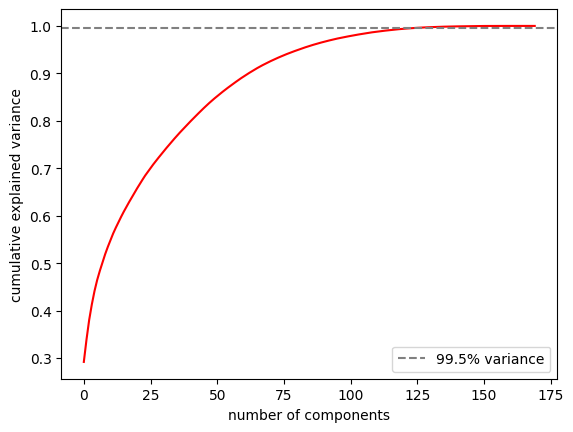

In [68]:
#pca_mean_impute = PCA()
pca_mean_impute = PCA().fit(mean_scaled) 
plt.plot(np.cumsum(pca_mean_impute.explained_variance_ratio_), color="red")
plt.axhline(y=0.995, color="grey", linestyle='--', label='99.5% variance')
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')
plt.legend()
plt.show()

In [69]:
principal_components = pca_mean_impute.fit_transform(mean_scaled)
explained_variance = pca_mean_impute.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [2.91949153e-01 4.69874867e-02 4.13064361e-02 3.28600114e-02
 2.80967730e-02 2.33419203e-02 1.93721357e-02 1.77521414e-02
 1.73872035e-02 1.54108743e-02 1.43016727e-02 1.39052664e-02
 1.22863637e-02 1.16660237e-02 1.13607591e-02 1.08460323e-02
 1.02015225e-02 1.00683931e-02 9.74817188e-03 9.71277931e-03
 9.39169940e-03 9.16632329e-03 8.93803829e-03 8.71627356e-03
 7.87590741e-03 7.74931124e-03 7.62297919e-03 7.22920022e-03
 7.10410214e-03 6.94464348e-03 6.93237028e-03 6.80170673e-03
 6.69108591e-03 6.56677490e-03 6.47047840e-03 6.40376483e-03
 6.16828281e-03 6.01137150e-03 5.93436866e-03 5.91717838e-03
 5.85991493e-03 5.76844932e-03 5.63173707e-03 5.60535298e-03
 5.54821434e-03 5.43947916e-03 5.28988480e-03 5.20048176e-03
 4.93817189e-03 4.86704564e-03 4.66452052e-03 4.57717094e-03
 4.53298678e-03 4.42531592e-03 4.24825126e-03 4.18873004e-03
 4.10272065e-03 4.07995253e-03 3.98045064e-03 3.91074417e-03
 3.73889515e-03 3.64148484e-03 3.56596141e-03 3.42382408e-

In [70]:
cumulative_variance = np.cumsum(pca_mean_impute.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.995) + 1
n_components

124

In [71]:
pca_995 = PCA(n_components=n_components)


pca_995.fit(mean_scaled)

data_transformed = pca_995.transform(mean_scaled)

In [72]:
data_transformed.shape

(60000, 124)

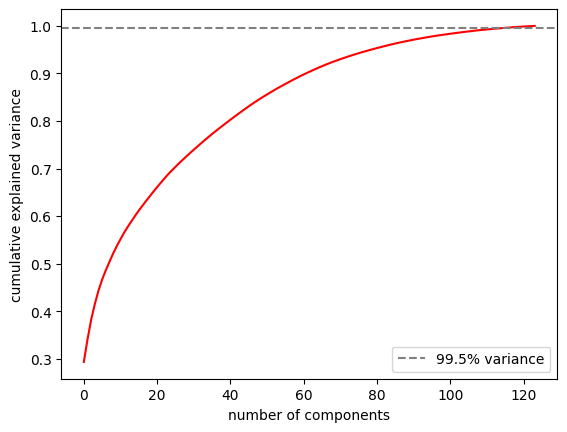

In [73]:
#pca_mean_impute = PCA()
pca_mean_impute1 = PCA().fit(data_transformed) 
plt.plot(np.cumsum(pca_mean_impute1.explained_variance_ratio_), color="red")
plt.axhline(y=0.995, color="grey", linestyle='--', label='99.5% variance')
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')
plt.legend()
plt.show()

<b>Mean imputation with log transformation

In [74]:
data = df_log_transformed.drop("class", axis=1)
Imputation_mean_log = data.fillna(data.mean())

In [75]:
scaler = StandardScaler()
mean_log_scaled = scaler.fit_transform(Imputation_mean_log)

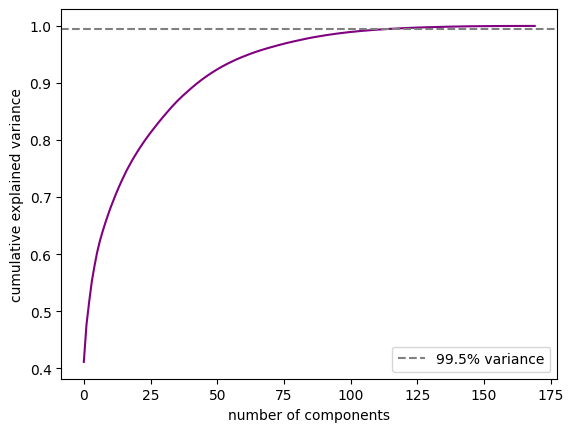

In [76]:
pca_mean_log_impute = PCA().fit(mean_log_scaled) 
plt.plot(np.cumsum(pca_mean_log_impute.explained_variance_ratio_), color="purple")
plt.axhline(y=0.995, color="grey", linestyle='--', label='99.5% variance')
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')
plt.legend()
plt.show()

In [77]:
principal_components = pca_mean_log_impute.fit_transform(mean_log_scaled)
explained_variance = pca_mean_log_impute.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [4.11164716e-01 6.54935014e-02 3.97263137e-02 3.60906657e-02
 2.69292528e-02 2.40358579e-02 1.94722979e-02 1.61714771e-02
 1.49807281e-02 1.39282228e-02 1.32479540e-02 1.21627697e-02
 1.17527227e-02 1.10553717e-02 1.04824258e-02 9.95467011e-03
 9.67411982e-03 8.71735641e-03 8.38772985e-03 8.02320071e-03
 7.62885090e-03 7.33264686e-03 7.02494868e-03 6.68178996e-03
 6.46710441e-03 6.35033901e-03 6.06521397e-03 5.94264271e-03
 5.87773241e-03 5.75698144e-03 5.58018835e-03 5.48585152e-03
 5.41877058e-03 5.25342332e-03 4.95571539e-03 4.89312510e-03
 4.68634464e-03 4.43787803e-03 4.25920292e-03 4.13020581e-03
 4.12783291e-03 4.01487505e-03 3.86112794e-03 3.74983678e-03
 3.60045486e-03 3.46380068e-03 3.35857527e-03 3.18052564e-03
 3.05055873e-03 2.96715799e-03 2.81562213e-03 2.75994398e-03
 2.60047671e-03 2.55102563e-03 2.42993403e-03 2.28668727e-03
 2.24416861e-03 2.11865409e-03 2.07612586e-03 1.95337299e-03
 1.88060805e-03 1.86152785e-03 1.76994561e-03 1.73163278e-

In [78]:
cumulative_variance = np.cumsum(pca_mean_log_impute.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.995) + 1
n_components

117

<b>Comparison of Mean Imputation with and without a log transformation

With a log transformation a lower amount of components is needed to be left with 99.5% variance. 123 for without the log transformation and 117 with it.

The row plot shows what's happening.

Initially when the two datasets are plotted it looks like the log transformation captures more signal, but when the imputed datasets are plotted next to the unimputed datasets it seems that both are approximations, which would be expected with a mean value.

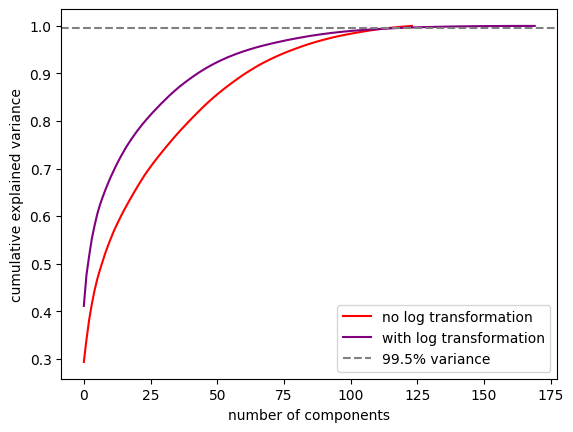

In [79]:
plt.plot(np.cumsum(pca_mean_impute1.explained_variance_ratio_), color="red", label="no log transformation")
plt.plot(np.cumsum(pca_mean_log_impute.explained_variance_ratio_), color="purple", label="with log transformation")

plt.axhline(y=0.995, color="grey", linestyle='--', label='99.5% variance')


plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')
plt.legend()
plt.show()

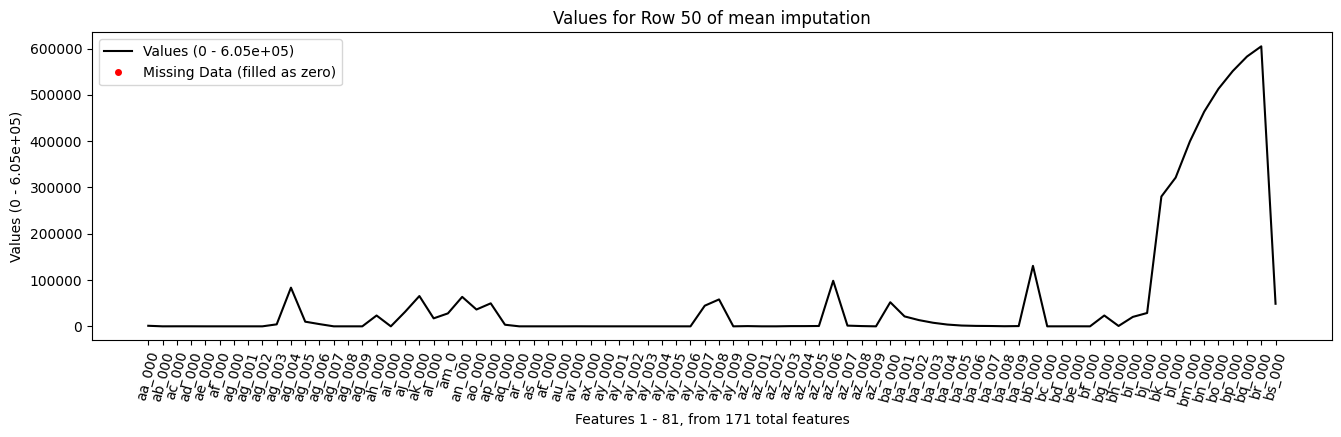

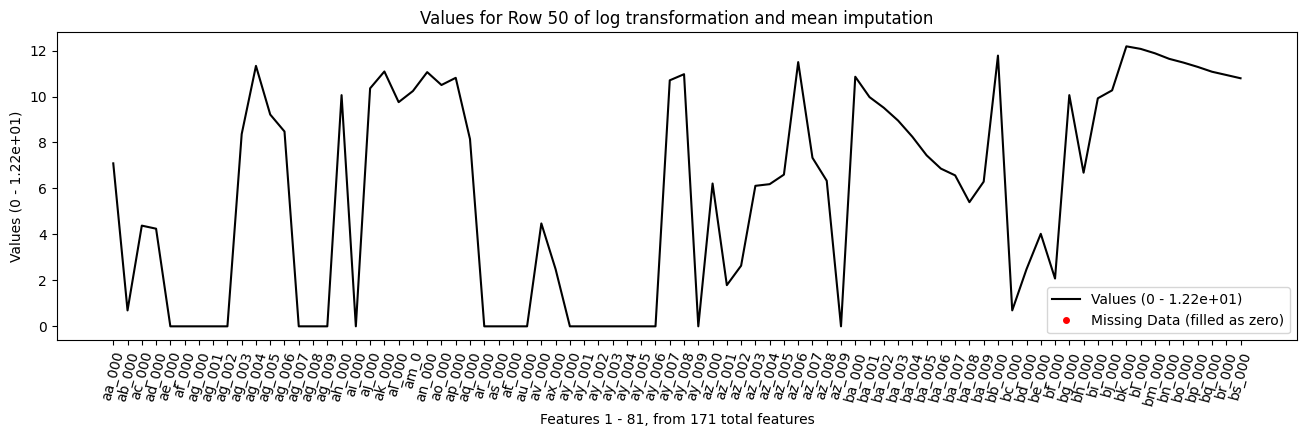

In [80]:
x = 50
row_plot(Imputation_mean, x, title="mean imputation")
row_plot(Imputation_mean_log, x, y_start=0, y_end=80, title="log transformation and mean imputation")

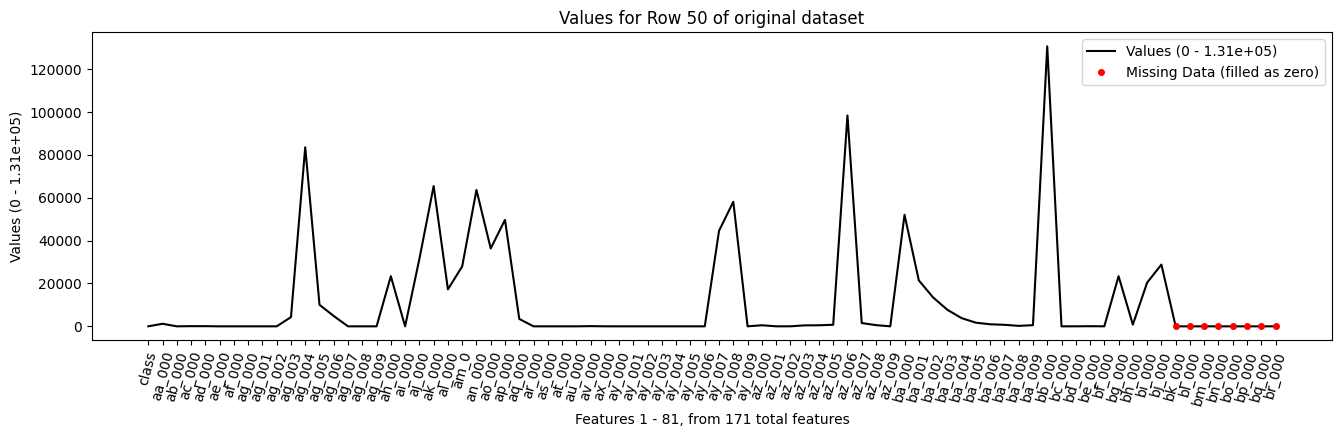

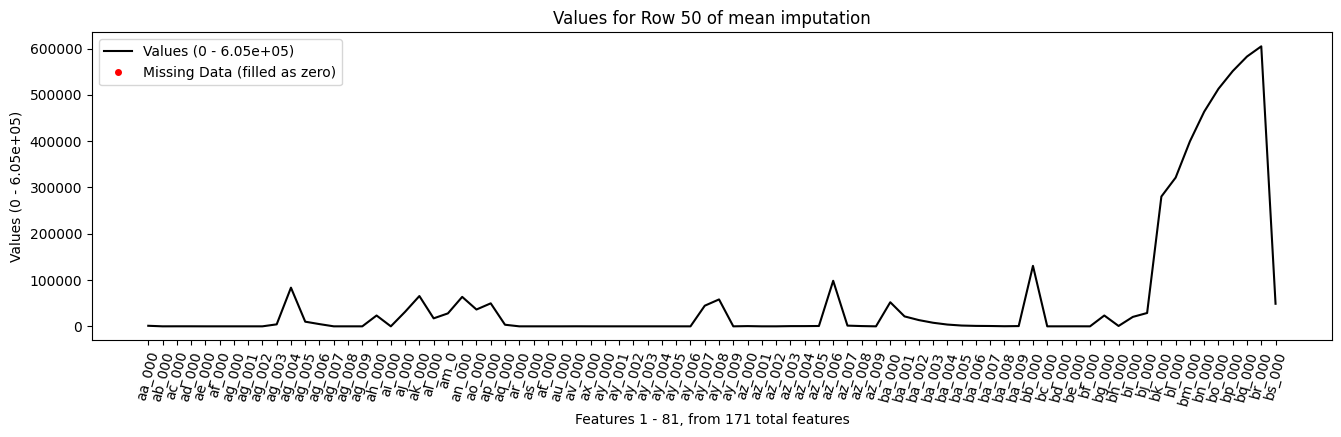

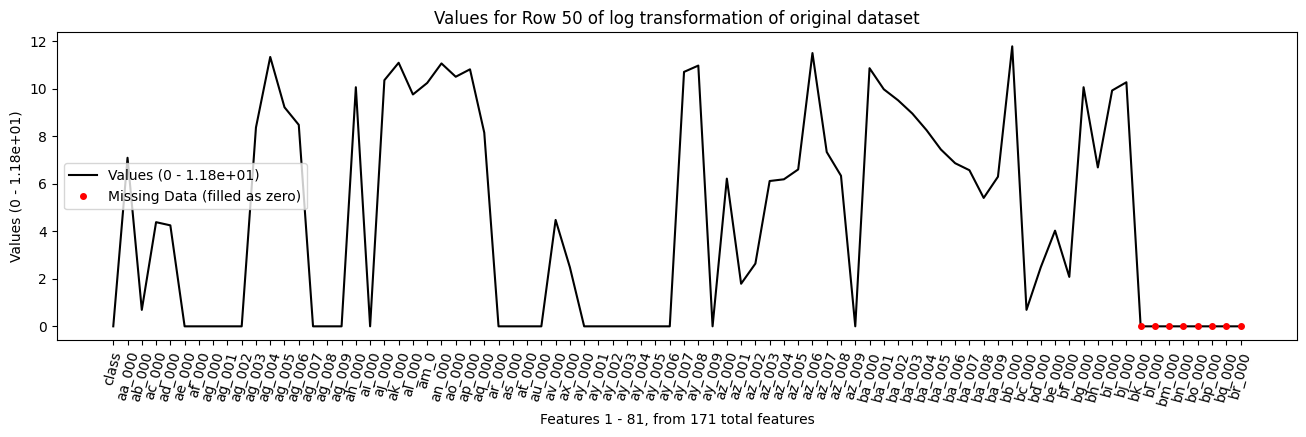

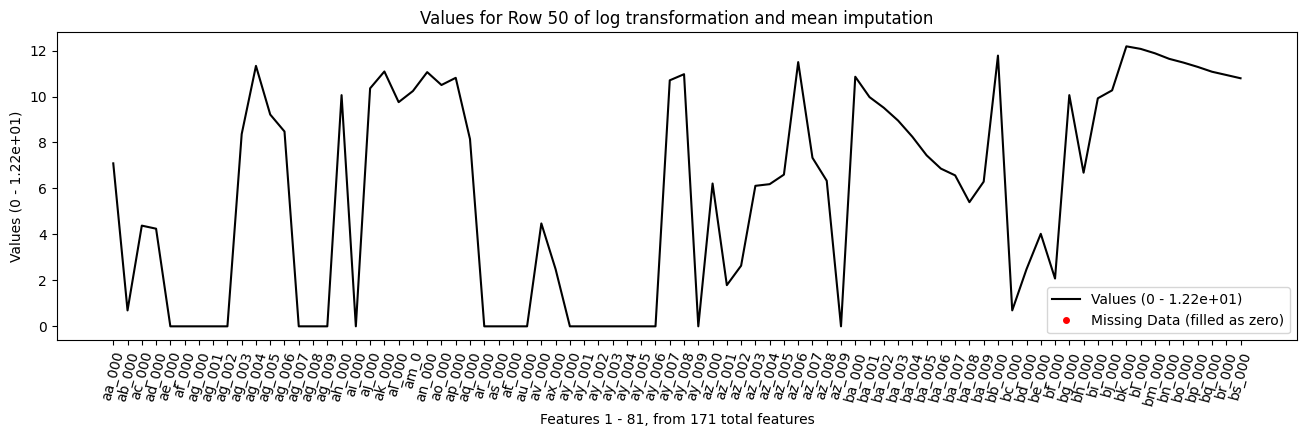

In [81]:
x = 50
row_plot(df, x,title="original dataset")
row_plot(Imputation_mean, x, title="mean imputation")
row_plot(df_log_transformed, x,title="log transformation of original dataset")
row_plot(Imputation_mean_log, x, y_start=0, y_end=80, title="log transformation and mean imputation")

<b>Other Imputations

Perhaps other imputations can capture the signal better.

This time a pipeline will be used to imputate, scale and perform PCA.

<b>KNN Imputer

In [82]:
sample = undersample(df)
X = sample.drop("class", axis=1)

In [83]:
from sklearn.impute import SimpleImputer
pipe = Pipeline([("imputer", SimpleImputer()), ("scaler", StandardScaler()), ("pca", PCA())])
X_processed = pipe.fit_transform(X)

In [84]:
mean_df = pd.DataFrame(data=X_processed, columns=X.columns)

KNN Imputation theory.. looks at n neighbours on row

In [85]:
pipe_knn_imputer = Pipeline([("imputer", KNNImputer()), ("scaler", StandardScaler()), ("pca", PCA())])
X_knn_im_pca = pipe_knn_imputer.fit_transform(X)

In [86]:
knn_df = pd.DataFrame(data=X_knn_im_pca, columns=X.columns)

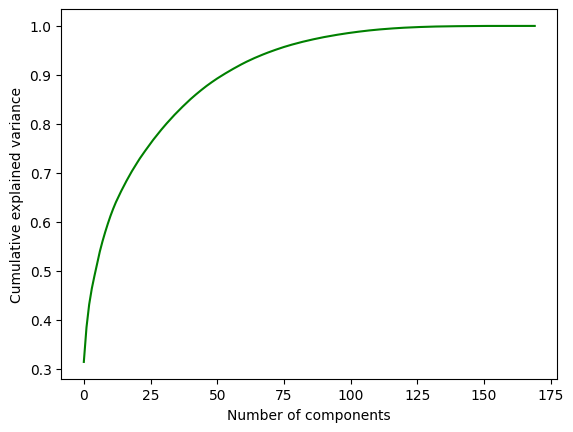

In [87]:
pca_knn_imputer = pipe_knn_imputer.named_steps['pca']
plt.plot(np.cumsum(pca_knn_imputer.explained_variance_ratio_), color="green")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

<b> Multiple Imputation

In [88]:
pipe_mi_imputer = Pipeline([("imputer", IterativeImputer(max_iter=10, random_state=0)), ("scaler", StandardScaler()), ("pca", PCA())])
x_mi_processed = pipe_mi_imputer.fit_transform(X)
mi_df = pd.DataFrame(data=x_mi_processed, columns=X.columns)

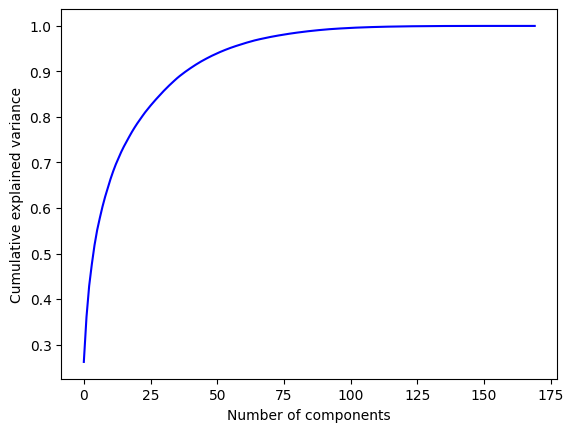

In [89]:
pca_mi_imputer = pipe_mi_imputer.named_steps['pca']
plt.plot(np.cumsum(pca_mi_imputer.explained_variance_ratio_), color="blue")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

<b>Dimensionality Reduction

<b>Principal Component Analysis -- most of the variance is in one variable -- is this the same when high % null are dropped

Performing PCA with two components is useful for visualisaton.

how comparable is a binary matrix of 1 was null, 0 was a number with the pca performed

Using multiple imputation rather than mean it picks out the pattern better with two features? (examine all these)

<b>Comparing imputations with PCA

With mean imputation the mean value remains the same but the variance is changed.

With multiple imputation 

While PCA kept 

When the  

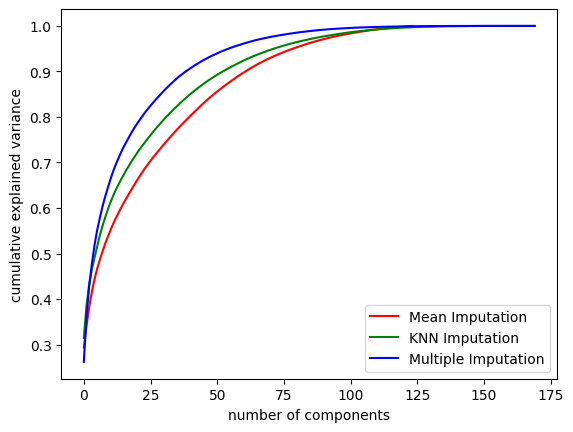

In [90]:
plt.plot(np.cumsum(pca_mean_impute1.explained_variance_ratio_), color="red", label="Mean Imputation")
plt.plot(np.cumsum(pca_knn_imputer.explained_variance_ratio_), color="green", label="KNN Imputation")
plt.plot(np.cumsum(pca_mi_imputer.explained_variance_ratio_), color="blue", label="Multiple Imputation")
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')
plt.legend()
plt.show()

Title


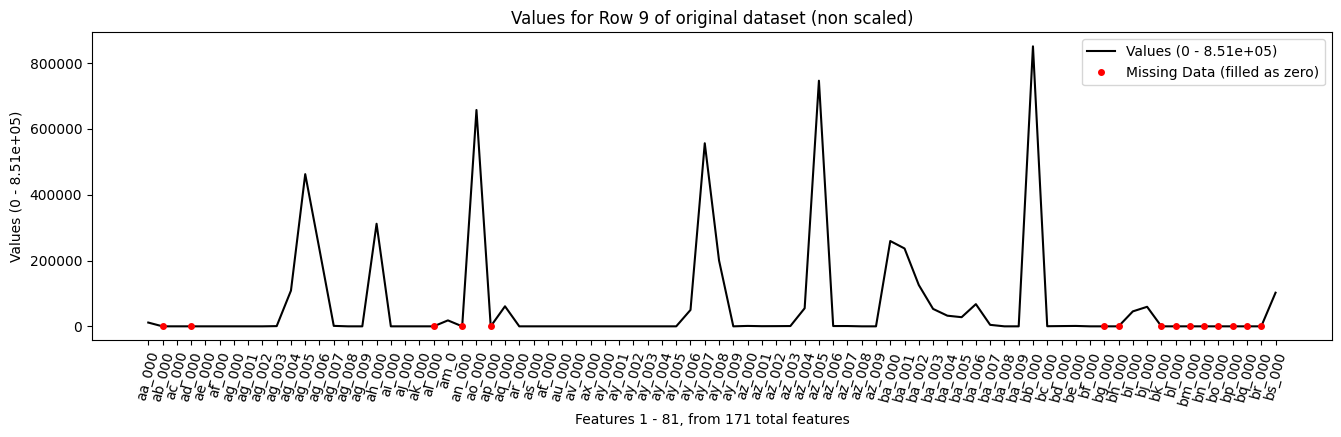

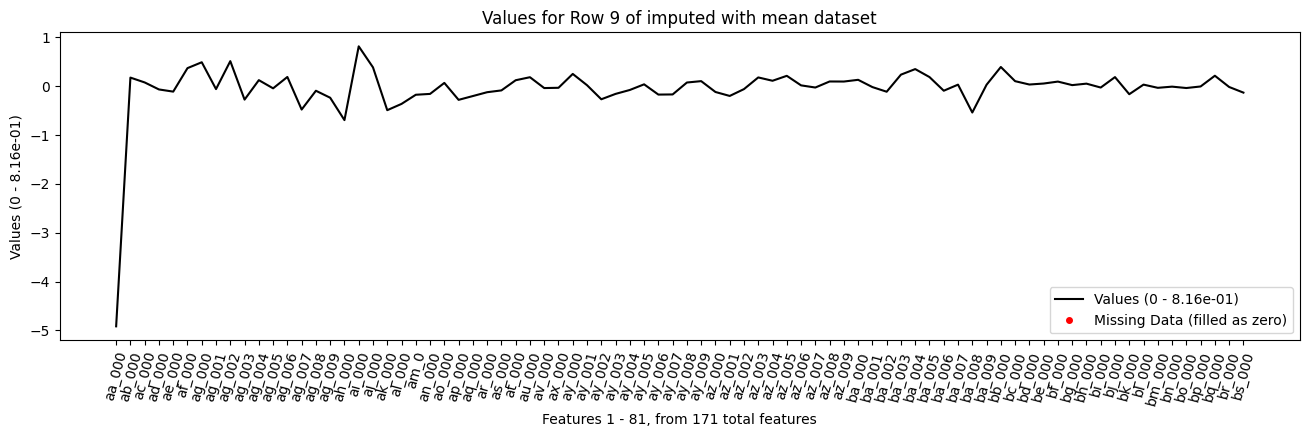

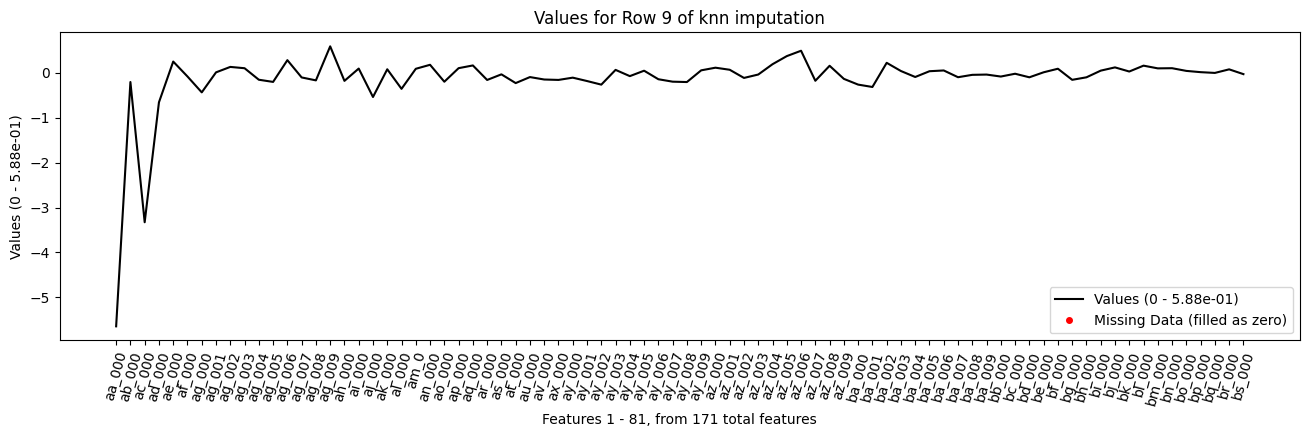

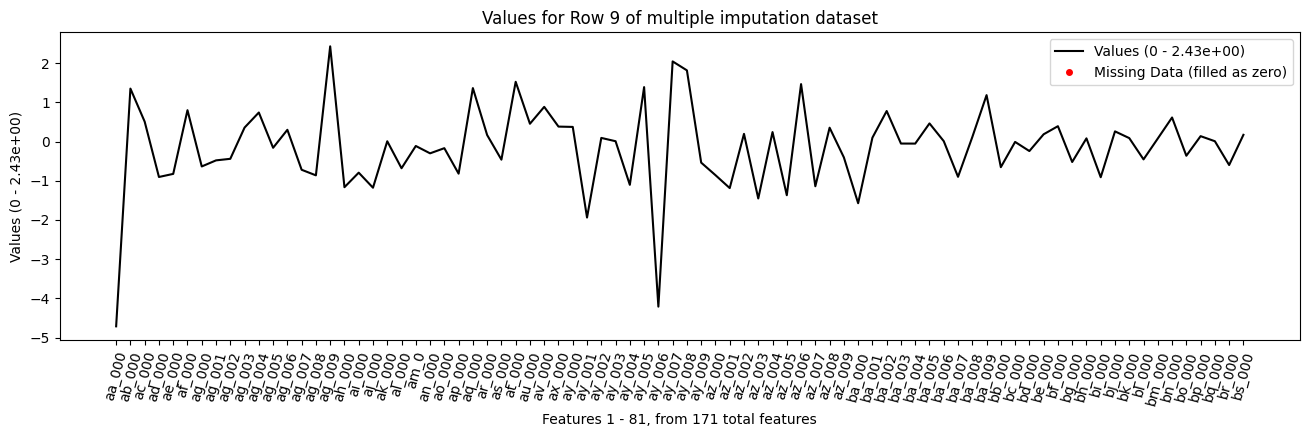

In [91]:
row = 9
print("Title")
row_plot(X, row, title="original dataset (non scaled)")
row_plot(mean_df, row, title="imputed with mean dataset")
row_plot(knn_df, row, y_start=0, y_end=80, title="knn imputation")
row_plot(mi_df, row, y_start=0, y_end=80, title="multiple imputation dataset")

<b>Keeping 99.5% Variance

While the data can be imputed before splitting, it is better to imputate before to not leak information.

<b>Train Test split

First the data is split

In [92]:
y_model = sample["class"]
X_model = sample.drop("class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=118)

In [93]:
# seperate pipelines 
pipe1 = Pipeline([("imputer", IterativeImputer(max_iter=10, random_state=0)), ("scaler", StandardScaler())])
pipe2 = Pipeline([("imputer", IterativeImputer(max_iter=10, random_state=0)), ("scaler", StandardScaler())])

X_train_processed = pipe1.fit_transform(X_train)
X_test_processed = pipe2.fit_transform(X_test)

# pca 99.5% variance
pca = PCA(n_components=0.995)

# same transformation on train and test
X_train_processed = pca.fit_transform(X_train_processed)
X_test_processed = pca.transform(X_test_processed)

pca.n_components_

94

In [94]:
# seperate pipelines 
pipe1 = Pipeline([("imputer", SimpleImputer()), ("scaler", StandardScaler())])
pipe2 = Pipeline([("imputer", SimpleImputer()), ("scaler", StandardScaler())])

X_train_processed = pipe1.fit_transform(X_train)
X_test_processed = pipe2.fit_transform(X_test)

# pca 99.5% variance
pca = PCA(n_components=0.995)

# same transformation on train and test
X_train_processed = pca.fit_transform(X_train_processed)
X_test_processed = pca.transform(X_test_processed)

pca.n_components_

119

The pipeline can be altered to create a model that keeps 99.5% variance.

For this the multiple imputation model is chosen. With Multiple Imputation 99 components are needed to keep 99.5% variance in the sample.

In [95]:
pipe = Pipeline([("imputer", IterativeImputer(max_iter=10, random_state=0)), ("scaler", StandardScaler()), ("pca", PCA(0.995))])
X_train_processed = pipe.fit_transform(X_train)
X_test_processed = pipe.transform(X_test)
pipe.named_steps['pca'].n_components_

94

In [96]:
X_test_processed.shape

(400, 94)

In [97]:
x_mi_processed

array([[-5.64570109e+00, -1.38242227e-01,  2.24650217e-01, ...,
         1.47398768e-08,  1.80601199e-11, -4.00137116e-16],
       [ 2.82163147e+00,  1.56634594e-01,  2.45779974e+00, ...,
        -1.40012170e-07, -6.07496018e-09, -5.25790151e-17],
       [-2.16242879e+00, -1.53432069e-01, -1.37826638e+00, ...,
        -7.89623274e-08, -1.18089464e-09, -2.91051618e-16],
       ...,
       [ 3.07189876e+00, -2.39119108e+00,  2.89381335e+00, ...,
        -1.74760358e-07, -4.87500400e-09,  2.13607065e-17],
       [ 5.26697196e+00,  1.31254321e+00, -2.98140782e+00, ...,
         1.48801170e-07,  4.09436151e-09,  1.64158592e-17],
       [ 1.48641349e+01,  1.68262014e-01, -7.74494501e+00, ...,
         1.04130489e-07, -6.86753678e-09,  5.61045719e-17]])

In [98]:
#y_model = sample["class"]
#X_model = x_mi_processed
#X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=118)

In [99]:
#X_test_processed.shape

<b>Classification

Now that the data has been dimensionality reduced it can be modelled.

<b>Logistic regression

Logistic regression is a simple classifier 

The results from Logistic Regression are an accuracy of 0.92, recall of 0.92 and f1 score of 0.92

In [100]:
model = LogisticRegression().fit(X_train_processed, y_train)
predictions = model.predict(X_test_processed)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.92


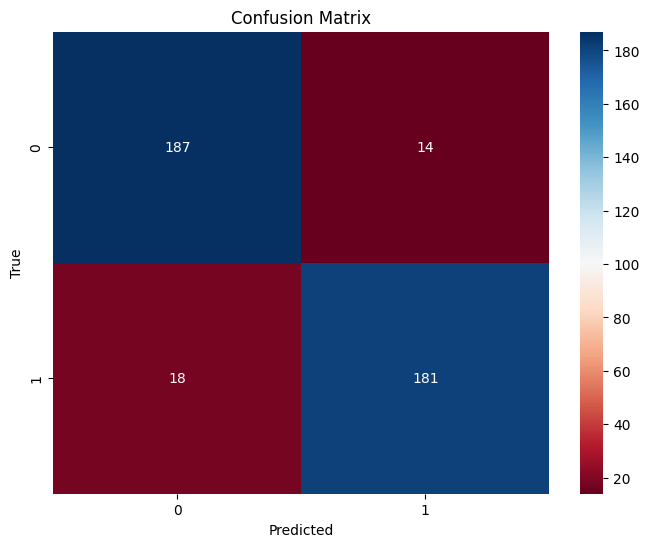

In [101]:
plot_confusion_matrix(y_test, predictions)

In [102]:
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       201
           1       0.93      0.91      0.92       199

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



<b>Cross validation

Cross validation to evaluate imputations

In [119]:
from sklearn.model_selection import cross_val_score


pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])


cv_scores = cross_val_score(pipeline, X_model, y_model, cv=5, scoring='accuracy')


print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.9425 0.945  0.9325 0.9475 0.9225]
Mean Accuracy: 0.9380000000000001


In [104]:
pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])


cv_scores = cross_val_score(pipeline, X_model, y_model, cv=5, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.9475 0.9475 0.9375 0.95   0.9325]
Mean Accuracy: 0.943


In [114]:
pipeline = Pipeline([
    ('imputer', KNNImputer()), 
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression()) 
])


cv_scores = cross_val_score(pipeline, X_model, y_model, cv=5, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.945  0.9475 0.93   0.9475 0.9225]
Mean Accuracy: 0.9385000000000001


<b>Other classification models

As Logistic regression was very accurate for the data it may not be needed to perform other models

In [120]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_processed, y_train)
dt_predictions = decision_tree.predict(X_test_processed)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Support Vector Machine (SVM)
svm = SVC(C=10)
svm.fit(X_train_processed, y_train)
svm_predictions = svm.predict(X_test_processed)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_processed, y_train)
knn_predictions = knn.predict(X_test_processed)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.8875
SVM Accuracy: 0.925
KNN Accuracy: 0.9125


In [121]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_processed, y_train)

predictions_dt = dt_classifier.predict(X_test_processed)

accuracy_dt = accuracy_score(y_test, predictions_dt)
report_dt = classification_report(y_test, predictions_dt)

print("Decision Tree Classifier Accuracy:", accuracy_dt)
print("Decision Tree Classifier Classification Report:")
print(report_dt)

Decision Tree Classifier Accuracy: 0.885
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       201
           1       0.87      0.90      0.89       199

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.88       400



In [122]:
svm_classifier = SVC()
svm_classifier.fit(X_train_processed, y_train)

predictions_svm = svm_classifier.predict(X_test_processed)

accuracy_svm = accuracy_score(y_test, predictions_svm)
report_svm = classification_report(y_test, predictions_svm)

print("SVM Classifier Accuracy:", accuracy_svm)
print("SVM Classifier Classification Report:")
print(report_svm)

SVM Classifier Accuracy: 0.9275
SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       201
           1       0.91      0.94      0.93       199

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [123]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_processed, y_train)

predictions_knn = knn_classifier.predict(X_test_processed)

accuracy_knn = accuracy_score(y_test, predictions_knn)
report_knn = classification_report(y_test, predictions_knn)

print("KNN Classifier Accuracy:", accuracy_knn)
print("KNN Classifier Classification Report:")
print(report_knn)

KNN Classifier Accuracy: 0.91
KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       201
           1       0.92      0.90      0.91       199

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



<b>Most important features -- potential LASSO and ridge here

How PCA works vs LASSO/Ridge reductions

<b>Maybe Pipeline here with feature engineering 

Data + IsMissing + Poly<br>
Different sample

<b>Conclusion

In each case 99.5% variance has been kept, but it includes noise from imputation. Plotting an individual row for each imputation showed difference in their scale and pattern. Scale is important for PCA as it is distance based.

Multiple Imputation eliminated more features with PCA while keeping 99.5% variance, and seemed to hold more pattern when plotted.

Cross Validation was performed with Logistic Regression which showed that in each imputation used the model can generalise well, but again the model is also learning the introduced noise, as imputation can not be said to create truth, and is employed here as a means to making the data useable.

<b>References

Géron, A. (2022) *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow* Sebastopol: O'Reilly Media, Inc.

Harrison, M. (2019) *Machine Learning Pocket Reference* Sebastopol: O'Reilly Media, Inc.

Müller & Guido (2019) *Introduction to Machine Learning with Python* Sebastopol: O'Reilly Media, Inc.

Rowntree, D. (2018) *Statistics without Tears: An Introduction for Non-Mathematicians.* Great Britain: Penguin Books

Spiegelhalter, D. (2019) *The Art of Statistics: Learning from Data.* Great Britain: Penguin Books

Upton & Cook (2014) *A Dictionary of Statistics.* United Kingdom: Oxford University Press